In [22]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
stop_words = stopwords.words('english')


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('train.csv')  
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


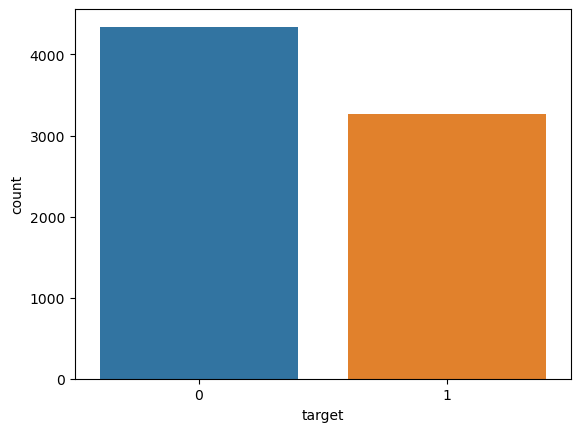

In [46]:
ax = sns.countplot(x="target", data=df)

In [25]:
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

def clean_text(text):
    
    text = text.lower()
    
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Removing URLs 
    #text = re.sub(r"http", "",text)
    
    html=re.compile(r'<.*?>') 
    
    text = html.sub(r'',text) #Removing html tags
    
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations
        
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    
    text = [lemmatizer.lemmatize(word) for word in text]
    
    text = " ".join(text) #removing stopwords
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis
    
    return text

In [6]:
df['text'] = df['text'].apply(lambda x: clean_text(x))
 
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake may allah forgive u,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,resident asked shelter place notified officer ...,1
3,6,NaN,NaN,", people receive wildfire evacuation order cal...",1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pour...,1


In [9]:
sample_corpora = df['text'].iloc[:2].values
sample_corpora

array(['deed reason earthquake may allah forgive u',
       'forest fire near la ronge sask canada'], dtype=object)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Your sample corpora
sample_corpora = ["This is the first document.",
                  "This document is the second document.",
                  "And this is the third one.",
                  "Is this the first document?"]

count_vectorizer = CountVectorizer()
wm = count_vectorizer.fit_transform(sample_corpora)

doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
feat_names = count_vectorizer.get_feature_names_out()

sample_df = pd.DataFrame(data=wm.toarray(), index=doc_names, columns=feat_names)
print(sample_df)


      and  document  first  is  one  second  the  third  this
Doc0    0         1      1   1    0       0    1      0     1
Doc1    0         2      0   1    0       1    1      0     1
Doc2    1         0      0   1    1       0    1      1     1
Doc3    0         1      1   1    0       0    1      0     1


In [12]:
X_train, X_test , y_train, y_test = train_test_split(df['text'].values,df['target'].values,test_size=0.2,random_state=123,stratify=df['target'].values)

In [13]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [14]:
classifier = RandomForestClassifier()

classifier.fit(tfidf_train_vectors,y_train)

RandomForestClassifier()

In [15]:
y_pred = classifier.predict(tfidf_test_vectors)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       869
           1       0.83      0.63      0.72       654

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.77      1523
weighted avg       0.79      0.79      0.78      1523



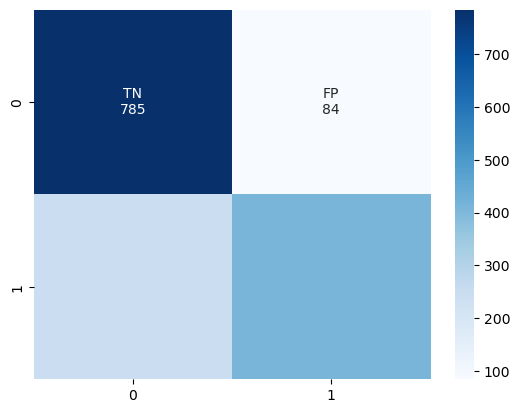

In [17]:
cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');